<a href="https://colab.research.google.com/github/sundarjhu/Astrostatistics2025/blob/main/Lesson05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let us first define a 3-element random vector with elements $x$, $y$, and $z$, each which are all random variables:

$\textbf{W} = \begin{bmatrix}
x \\
y \\
z
\end{bmatrix}$

The covariance matrix for $W$ is then
$\textrm{Cov}(\textbf{W}) = \begin{bmatrix}
\textrm{Cov}(x, x) & \textrm{Cov}(x, y) & \textrm{Cov}(x, z)\\
\textrm{Cov}(y, x) & \textrm{Cov}(y, y) & \textrm{Cov}(y, z)\\
\textrm{Cov}(z, x) & \textrm{Cov}(z, y) & \textrm{Cov}(z, z)\\
\end{bmatrix} = \begin{bmatrix}
\textrm{Var}(x) & \textrm{Cov}(x, y) & \textrm{Cov}(x, z)\\
\textrm{Cov}(y, x) & \textrm{Var}(y) & \textrm{Cov}(y, z)\\
\textrm{Cov}(z, x) & \textrm{Cov}(z, y) & \textrm{Var}(z)\\
\end{bmatrix}= \begin{bmatrix}
\sigma_x^2 & \textrm{Cov}(x, y) & \textrm{Cov}(x, z)\\
\textrm{Cov}(y, x) & \sigma_y^2 & \textrm{Cov}(y, z)\\
\textrm{Cov}(z, x) & \textrm{Cov}(z, y) & \sigma_z^2\\
\end{bmatrix}$

# 1. Covariance when there is explicit dependence

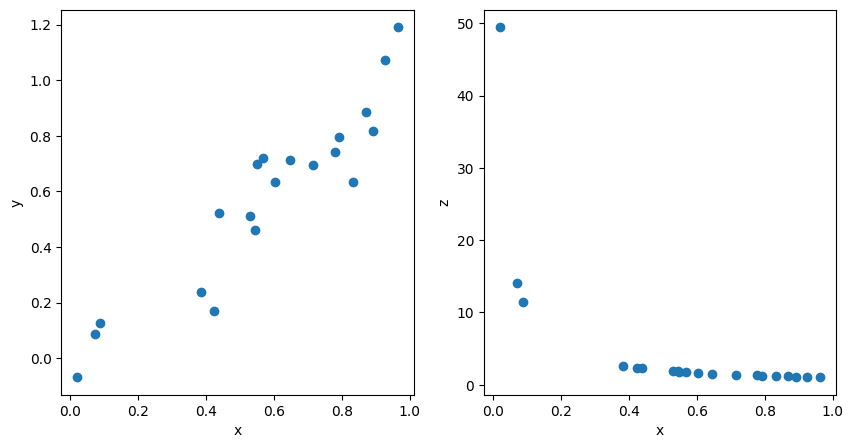

In [65]:
import numpy as np
from scipy.stats import norm
seed = 0
np.random.seed(seed)
x = np.random.uniform(size = 20)
y = x + norm.rvs(loc=0.0, scale=0.1, size = 20) # random scatter around a linear relation
z = 1 / x

import matplotlib.pyplot as plt
# plot two panels, one for y vs x and the other for z vs x
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
ax[0].scatter(x, y)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[1].scatter(x, z)
ax[1].set_xlabel('x')
ax[1].set_ylabel('z')
plt.show()

In [50]:
W = np.array([x, y, z])
cov = np.cov(W)

In [51]:
# print out Cov(x, y)

In [52]:
# print out Cov(x, z)

In the code above, both $y$ and $z$ are defined such that they are explicit functions of $x$, therefore they should be strongly (anti)correlated with $x$.

Do the values of the covariances above reflect this?

# 2. Is this covariance independent of scale?
#### All we'll do is increase the scale of the dependent variable, and redo the calculations.

In [62]:
y = 180 * (x + norm.rvs(loc=0.0, scale=0.1, size = 20))
np.cov(np.array([x, y]))

array([[8.01360090e-02, 1.53329071e+01],
       [1.53329071e+01, 3.25716649e+03]])

# Hmm, so the covariance is scale-dependent.
This doesn't help us determine, in general, whether one pair of functions is more correlated than another.

# 3. Covariance between uncorrelated random variables

In [ ]:
seed2 = seed + 1000
size = 20
np.random.seed(seed)
x = np.random.uniform(size = size)
np.random.seed(seed2)
q = np.random.uniform(size = size)
print(np.cov(np.array([x, q])))

[[0.08453222 0.00129443]
 [0.00129443 0.08870495]]


In [ ]:
# Which of the above numbers is Cov(x, q)?

In [ ]:
# How does Cov(x, q) change if `size` is increased to 100, 1000, 10000? Why?

# 4. Covariance with explicit dependence AND outliers

#### Let's add some outliers to linear relationship from before:

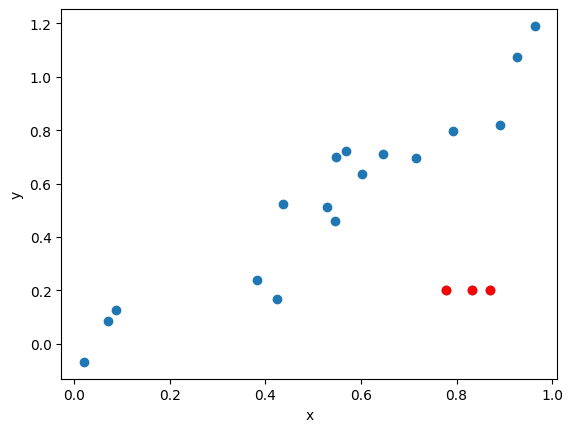

In [66]:
y[-3:] = 0.2

plt.scatter(x, y)
plt.plot(x[-3:], y[-3:], 'ro')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [69]:
print(np.cov(np.array([x, y])))

[[0.08013601 0.0658541 ]
 [0.0658541  0.11936858]]


# Issues discovered so far: (a) scale-dependent (b) less sensitive to nonlinear relationships (c) sensitive to outliers

# Make the dependence scale-independent by dividing by the scales (standard deviations)
### $\rho_{_{XY}} = \displaystyle{\textrm{Cov}(X, Y)\over \sqrt{\textrm{Var}(X)} \sqrt{\textrm{Var}(Y)}}$
### This is called the Pearson Correlation Coefficient.

### In terms of $\rho$, the covariance matrix becomes
### $\textrm{Cov}(\textbf{W}) = \begin{bmatrix}
\sigma_x^2 & \rho_{_{xy}}\sigma_x\sigma_y & \rho_{_{xz}}\sigma_x\sigma_z\\
\rho_{_{yx}}\sigma_y\sigma_x & \sigma_y^2 & \rho_{_{yz}}\sigma_y\sigma_z\\
\rho_{_{zx}}\sigma_z\sigma_x & \rho_{_{zy}}\sigma_z\sigma_y & \sigma_z^2\\
\end{bmatrix}$

# $\rho$ is scale-independent by definition!

In [75]:
y = x + norm.rvs(loc=0.0, scale=0.1, size = 20)
cov = np.cov(np.array([x, y]))
corr = cov / np.sqrt(cov[0, 0]) / np.sqrt(cov[1, 1])
print(corr)

[[1.11075975 0.96552519]
 [0.96552519 0.9002847 ]]


In [76]:
cov = np.cov(np.array([x, 180 * y]))
corr = cov / np.sqrt(cov[0, 0]) / np.sqrt(cov[1, 1])
print(corr)

[[6.17088748e-03 9.65525191e-01]
 [9.65525191e-01 1.62051245e+02]]


# Consider a series of random numbers. Sort it in ascending order. The **rank** of a number in the original series is its location in the sorted series.

#### X = [0.1, 0.04, 0.9, 0.06, -2]
#### X_sorted = [-2, 0.04, 0.06, 0.1, 0.9]
#### The rank array is then
#### R[X] = [4, 2, 5, 3, 1]  ($\texttt{scipy.stats.rankdata}$(X) will do this for you)

# Spearman Rank Correlation Coefficient

Instead of computing the correlation coefficient between $X$ and $Y$, calculate it for $\textrm{R}[X]$ and $\textrm{R}[Y]$:

# $r_{_s} = \rho_{_{\textrm{R}[X]\ \textrm{R}[Y]}} = \displaystyle{\textrm{Cov}(\textrm{R}[X], \textrm{R}[Y])\over \sqrt{\textrm{Var}(\textrm{R}[X])}\sqrt{\textrm{Var}(\textrm{R}[Y])}}$

Like the Pearson Coefficient, $r_{_s}$ is also scale-independent.

# $r_{_s}$ is much better at detecting nonlinear dependence!

In [78]:
from scipy.stats import rankdata

y = x + norm.rvs(loc=0.0, scale=0.1, size = 20) # random scatter around a linear relation
z = 1 / x

Rx = rankdata(x)
Ry = rankdata(y)
Rz = rankdata(z)

covXY = np.cov(np.array([Rx, Ry]))
covXZ = np.cov(np.array([Rx, Rz]))

print(covXY / np.sqrt(covXY[0, 0]) / np.sqrt(covXY[1, 1]))
print(covXZ / np.sqrt(covXZ[0, 0]) / np.sqrt(covXZ[1, 1]))

[[1.         0.87819549]
 [0.87819549 1.        ]]
[[ 1. -1.]
 [-1.  1.]]


# $r_{_s}$ is much more robust!

In [79]:
y[-3:] = 0.2

Rx = rankdata(x)
Ry = rankdata(y)

covXY = np.cov(np.array([Rx, Ry]))
print(covXY / np.sqrt(covXY[0, 0]) / np.sqrt(covXY[1, 1]))

[[1.00150716 0.50903672]
 [0.50903672 0.99849511]]
